Q1

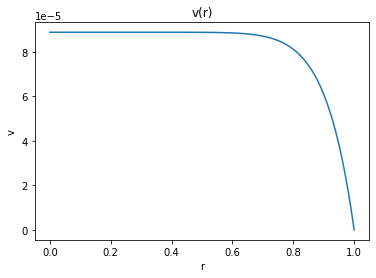

In [ ]:
import math
from matplotlib import pyplot as plt
from matplotlib import animation as ani
import numpy as np
from IPython.display import HTML
def cal_v(r,n=0.1):
  R=1
  beta=0.02
  mu=0.02
  c1=(beta/(2*mu))**(1/n)
  c2=R**(1+1/n)-r**(1+1/n)
  return c1*n/(n+1)*c2
#plot v(r)
R=1
r_x=np.arange(0,R+0.01,0.01)
v_y=[]
for r in r_x:
  v_y.append(cal_v(r))
plt.plot(r_x,v_y)
plt.title("v(r)")
plt.xlabel("r")
plt.ylabel('v')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


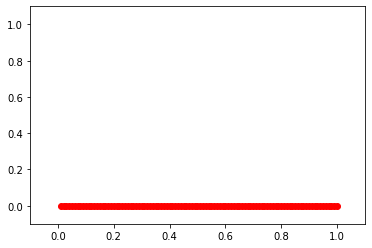

In [ ]:
fig=plt.figure()
axis=plt.axes(xlim=(-0.1,1.1),ylim=(-0.1,1.1))
line, = axis.plot([], [], 'ro') 
def init():
  line.set_data([],[])
  return line,
def animate(i):
  n=1-i
  R=1
  r_x=np.arange(0,R+0.01,0.01)
  v0=cal_v(0,n)
  #print(n,v0)
  v_y=[]
  for r in r_x:
    v_y.append(cal_v(r,n)/v0)
  line.set_data(r_x,v_y)
  return line,
iter=np.linspace(0.01,1.01,100)
anim=ani.FuncAnimation(fig,animate,init_func=init,frames=iter,interval=60,blit=True)
HTML(anim.to_html5_video())

Q2

In [ ]:
def func(x):
  c1=x/(x**2+1)
  return c1*math.cos(10*pow(x,2))
def trapezoid(func,n,low,up):
  points,step_size=np.linspace(low,up,num=n+1,retstep=True)
  ans=0
  #print(points)
  #print(step_size)
  for i in range(len(points)-1):
    #print(func(points[i]))
    #print(func(points[i+1]))
    ans+=(func(points[i])+func(points[i+1]))/2
  ans=ans*step_size
  return ans
def simpson(func,n,low,up):
  points,h=np.linspace(low,up,num=n+1,retstep=True)
  ans=0
  for i in range(len(points)):
    if i==0 or i==len(points)-1:
      ans+=func(points[i])
    elif i%2==1:
      ans+=4*func(points[i])
    else:
      ans+=2*func(points[i])
  return ans*h/3
slic=[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024 ,2048]
simp=[]
trap=[]
for n in slic:
  simp.append(simpson(func,n,0,math.pi))
  trap.append(trapezoid(func,n,0,math.pi))
print('num of slices: '+str(slic))
print('simpson    : '+str(simp))
print('trapezoid   : '+str(trap))

num of slices: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
simpson    : [0.8112005050070575, 0.891458706051217, 0.6471309989986372, 0.1516695322534012, -0.029324649401359346, -0.010682015536275812, 0.00012440007087462725, 0.0003062358876609296, 0.0003150462547031577, 0.00031556631081107006, 0.00031559836423725965]
trapezoid   : [0.5787695694394058, 0.8132864218982641, 0.688669854723544, 0.285919612870937, 0.049486416166714724, 0.0043600923894718145, 0.0011833231505239258, 0.0005255077033766514, 0.0003676616168714891, 0.0003285901373261804, 0.00031884630750948545]


Q3a

In [ ]:
def adaptive_trap(func,epsilon,low,up):
  n=1
  while True:
    x,h=np.linspace(low,up,num=n+1,retstep=True)
    ans=0
    if n==1:
      for i in range(len(x)-1):
        ans+=(func(x[i])+func(x[i+1]))/2
      ans=ans*h
    else:
      ans+=pre/2
      for i in range(len(x)):
        if i%2==1:
          ans+=func(x[i])*h
    if n!=1:
      print(n,ans,abs(ans-pre))
    if n==1:
      pre=ans
      n=n*2
    elif abs(ans-pre)<epsilon:
      return ans
      break
    else:
      pre=ans
      n=n*2
def f_3(x):
  return math.sin(math.sqrt(100*x))**2
print(adaptive_trap(f_3,1e-6,0,1))

2 0.3252319078064746 0.1772524232598226
4 0.5122828507233314 0.18705094291685676
8 0.40299744847824825 0.1092854022450831
16 0.430103369294747 0.027105920816498763
32 0.44841466578746986 0.01831129649272284
64 0.45391293121537585 0.005498265427905991
128 0.4553485043728023 0.0014355731574264285
256 0.45571126645324117 0.00036276208043889424
512 0.45580219965166413 9.093319842295999e-05
1024 0.45582494813241986 2.2748480755729883e-05
2048 0.4558306362016452 5.6880692253513665e-06
4096 0.4558320582782706 1.4220766254013917e-06
8192 0.4558324138011359 3.5552286531403965e-07
0.4558324138011359


Q3b

In [ ]:
def romberg(func,epsilon,low,up):
  r=[]
  i=0
  while True:
    r.append([trapezoid(func,2**i,low,up)])
    for j in range(1,i+1):
      pqr=((4**j)*r[i][j-1]-r[i-1][j-1])/(4**j-1)
      r[i].append(pqr)
    if i!=0:
      error=abs(r[i][i]-r[i-1][i-1])
      if error<epsilon:
        return r
        break
    i+=1
r=romberg(f_3,1e-6,0,1)
for i in range(len(r)):
  print(r[i])

[0.147979484546652]
[0.3252319078064746, 0.38431604889308213]
[0.5122828507233315, 0.5746331650289505, 0.5873209727713417]
[0.4029974484782483, 0.3665689810632206, 0.3526980354655053, 0.3489738618574762]
[0.430103369294747, 0.4391386762335799, 0.4439766559116038, 0.44542552290281173, 0.44580376471083266]
[0.44841466578746997, 0.4545184312850443, 0.45554374828847527, 0.455727352929378, 0.4557677522628155, 0.45577749223109704]
[0.4539129312153759, 0.4557456863580112, 0.4558275033628757, 0.4558320074116757, 0.4558324178214102, 0.4558324810330999, 0.4558324944613788]
[0.455348504372802, 0.45582702875861064, 0.45583245158531727, 0.45583253012853064, 0.4558325321784007, 0.4558325322901866, 0.4558325323027036, 0.4558325323050134]


Q4a)


In [ ]:
def f_4(x):
  return (x**4)*math.exp(x)/((math.exp(x)-1)**2)
"""
def legendre(n,x):
  if n==0:
    return 1
  sol=[1,x]
  for i in range(2,n+1):
    sol.append(((2*i-1)*sol[i-1]*x-(i-1)*sol[i-2])/i)
  return sol
def legendre_diff(n,x):
  kkk=legendre(n,x)
  return n/(x**2-1)*(x*kkk[n-1]-kkk[n-2])
"""
def legendre_root_w(n):
  x=[]
  for i in range(n):
    x.append(math.cos(math.pi*(i-0.25)/(n+0.5)))
  x=np.array(x)
  epsilon=1e-15
  delta=1
  while delta>epsilon:
    p0=np.ones(n,float)
    p1=np.copy(x)
    for i in range(1,n):
      p0,p1=p1,((2*i+1)*p1*x-p0*i)/(i+1)
    dp=(n+1)*(p0-x*p1)/(1-x*x)
    dx=p1/dp
    x=x-dx
    delta=max(abs(dx))
  w=2*(n+1)*(n+1)/(n*n*(1-x*x)*dp*dp)
  return x,w
def gauss_quad(func,n,low,up):
  x,w=legendre_root_w(n)
  #print(x)
  #print(w)
  x=0.5*(up-low)*x+0.5*(up+low)
  w=0.5*(up-low)*w
  ans=0
  for i in range(n):
    ans+=func(x[i])*w[i]
    #print(i,ans,x[i],w[i])
  return ans
def cv(T):
  rho=6.022e28
  V=1000/(100*100*100)
  theta_d=428
  k_b=1.380649e-23
  c1=9*V*rho*k_b*pow(T/theta_d,3)
  return c1*gauss_quad(f_4,50,0,theta_d/T)


Q4b

Text(0, 0.5, 'heat capacity')

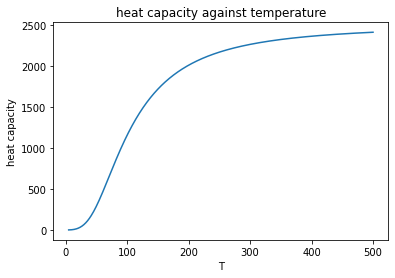

In [ ]:

x_4=np.linspace(5,500,500)
y_4=[]
for t in x_4:
  y_4.append(cv(t))
plt.plot(x_4,y_4)
plt.title('heat capacity against temperature')
plt.xlabel('T')
plt.ylabel('heat capacity')


Q5a)<br>
̇$E=\frac{1}{2}\times(\frac{dx}{dt})^2+V,$ <br>
$dt=\sqrt{\frac{1}{2}\frac{m}{V(a)-V}}dx,$<br>
$\frac{T}{4}=\int_{0}^{T/4}dt=\int_{0}^{a}\sqrt{\frac{1}{2}\frac{m}{V(a)-V}}dx,$<br>
$T=\int_{0}^{a}\sqrt{\frac{8m}{V(a)-V(x)}}dx$

Text(0, 0.5, 'period')

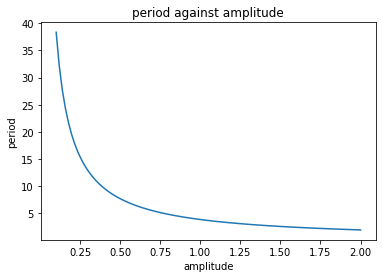

In [ ]:
def cal_period(a):
  m=1
  def f_5(x):
    if x!=a:
      return 1/math.sqrt(a**4-x*x*x*x)
    else:
      return 0
  return math.sqrt(8*m)*gauss_quad(f_5,20,0,a)
x_5=np.linspace(0.1,2,100)
y_5=[]
for k in x_5:
  y_5.append(cal_period(k))
plt.plot(x_5,y_5)
plt.title('period against amplitude')
plt.xlabel('amplitude')
plt.ylabel('period')

Q5c) When the amplitude is larger, the total energy is larger. The speed is therefore larger, and it takes shorter time to complete a period.

Q6a)

Text(0, 0.5, 'phi')

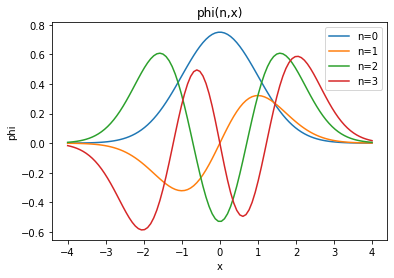

In [ ]:
def H(n,x):
  if n==0:
    return 1
  elif n==1:
    return x
  else:
    sol=[1,2*x]
    for k in range(1,n+2):
      sol.append(2*x*sol[k]-(k)*2*sol[k-1])
    return sol[n]
def phi(n,x):
  c1=math.exp(-x*x*0.5)/math.sqrt((2**n)*math.factorial(n)*math.sqrt(math.pi))
  return c1*H(n,x)
for n in range(4):
  x_6=np.linspace(-4,4,100)
  y_6=[]
  for k in x_6:
    y_6.append(phi(n,k))
  plt.plot(x_6,y_6)
plt.legend(['n=0','n=1','n=2','n=3'])
plt.title('phi(n,x)')
plt.xlabel('x')
plt.ylabel('phi')

Q6b)

-0.036591529846191406


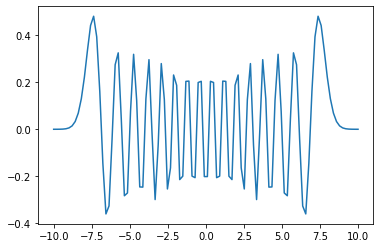

In [ ]:
import time
begin = time.time()
x_6=np.linspace(-10,10,100)
y_6=[]
for k in x_6:
  y_6.append(phi(30,k))
plt.plot(x_6,y_6)
end = time.time()
print(begin-end)

Q6c)

In [ ]:
def cal_rms(n):
  def f_6(x):
    p=math.tan(x)
    q=p*p*(phi(n,p)**2)/(math.cos(x)**2)
    #print(q)
    return q
  ans=gauss_quad(f_6,100,-0.5*math.pi,0.5*math.pi)
  return math.sqrt(ans)
cal_rms(5)

2.3452078797796543

Q7a)<br>
$dF=\frac{GM}{r^2}dm$<br>
$M=1kg, dm=\sigma da=\sigma dxdy, r=(x^2+y^2+z^2)^{\frac{1}{2}}$<br>
The force is along z axis, we need to multiply $dF$ by $cos\theta=\frac{z}{(x^2+y^2+z^2)^{\frac{1}{2}}}$ <br>
Therefore,<br>
$F_z=\int dF cos\theta=\int \int^{\frac{L}{2}}_{-\frac{L}{2}}G\sigma z\frac{dxdy}{(x^2+y^2+z^2)^{\frac{3}{2}}}$

Q7b) (please wait for some times before the program finish running)

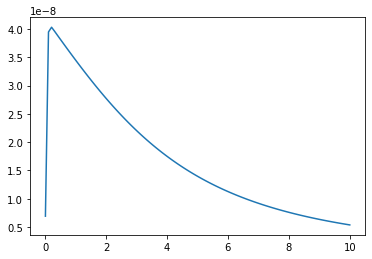

In [ ]:
def cal_fz(z):
  G=6.674e-11
  sigma=10*1000/100
  def f_7_x(x):
    def f_7_y(y):
      return (x*x+y*y+z*z)**(-1.5)
    return gauss_quad(f_7_y,100,-5,5)
  return G*sigma*z*gauss_quad(f_7_x,100,-5,5)
z_7=np.linspace(0.01,10,100)
fz=[]
for k in z_7:
  fz.append(cal_fz(k))
plt.plot(z_7,fz)

Q7c) When z→0, the program would return small values because F(z)=z×(other term). To eliminate this, we could Taylor expand F(z) and use the first few terms of the series as F(z) when z is small.